# 🔹Electric Vehicles Market Analysis🔹

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
df = pd.read_excel("FEV-data-Excel.xlsx")
df.head()

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
1,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71.0,340,...,3040.0,670.0,5,5,19,190,660.0,6.8,150,23.80
2,Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95.0,364,...,3130.0,565.0,5,5,20,210,660.0,4.5,150,27.55
3,Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71.0,346,...,3040.0,640.0,5,5,19,190,615.0,6.8,150,23.30
4,Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,357000,360,664,disc (front + rear),4WD,95.0,447,...,3130.0,670.0,5,5,19,200,615.0,5.7,150,23.85


# 🔹 Task 1: Budget Filter and Grouping

In [3]:
# Task 1a: Filter EVs with price <= 350,000 PLN and range >= 400 km
filtered_df = df[(df['Minimal price (gross) [PLN]'] <= 350000) & (df['Range (WLTP) [km]'] >= 400)]

# Task 1b: Group by manufacturer
grouped = filtered_df.groupby('Make')

# Task 1c: Calculate average battery capacity for each manufacturer
avg_battery = grouped['Battery capacity [kWh]'].mean().sort_values(ascending=False)
print(avg_battery)


Make
Audi             95.000000
BMW              80.000000
Mercedes-Benz    80.000000
Volkswagen       70.666667
Tesla            68.000000
Hyundai          64.000000
Kia              64.000000
Name: Battery capacity [kWh], dtype: float64


# 🔹 Task 2: Detect Outliers in Energy Consumption

In [15]:
# Task 2: Detect Outliers in Energy Consumption

# Use the correct column name as printed: 'mean - Energy consumption [kWh/100 km]'
energy = df['mean - Energy consumption [kWh/100 km]']

# Calculate IQR (Interquartile Range)
Q1 = energy.quantile(0.25)
Q3 = energy.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
outliers = df[(energy < lower_bound) | (energy > upper_bound)]

# Show the outlier EVs with their energy consumption
print(outliers[['Car full name', 'mean - Energy consumption [kWh/100 km]']])


Empty DataFrame
Columns: [Car full name, mean - Energy consumption [kWh/100 km]]
Index: []


# 🔹 Task 3: Relationship between Battery Capacity and Range

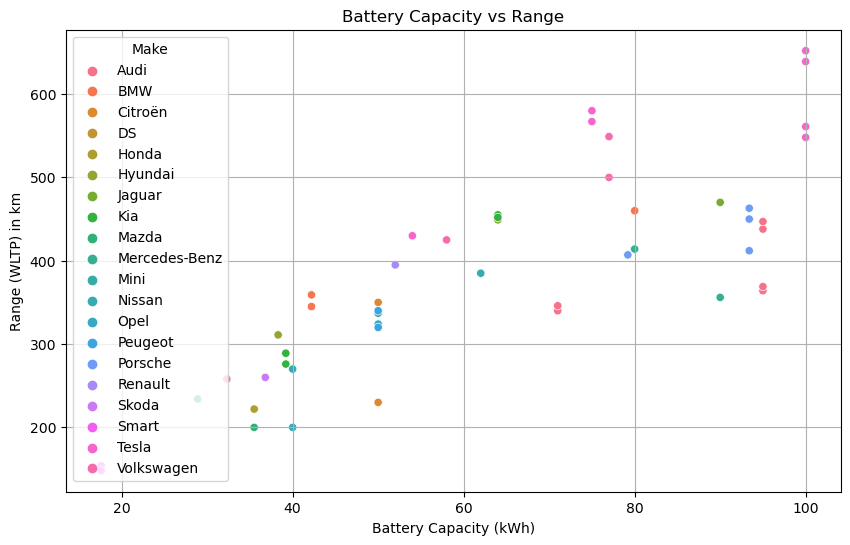

In [9]:
# Task 3a: Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Battery capacity [kWh]', y='Range (WLTP) [km]', hue='Make')
plt.title("Battery Capacity vs Range")
plt.xlabel("Battery Capacity (kWh)")
plt.ylabel("Range (WLTP) in km")
plt.grid(True)
plt.show()

# Task 3b: Insight
# Usually, as battery capacity increases, the range also increases.


# 🔹 Task 4: EV Recommendation Class

In [10]:
class EVRecommender:
    def __init__(self, df):
        self.df = df

    def recommend(self, budget, min_range, min_battery):
        result = self.df[
            (self.df['Minimal price (gross) [PLN]'] <= budget) &
            (self.df['Range (WLTP) [km]'] >= min_range) &
            (self.df['Battery capacity [kWh]'] >= min_battery)
        ]
        return result[['Car full name', 'Make', 'Minimal price (gross) [PLN]', 
                       'Battery capacity [kWh]', 'Range (WLTP) [km]']].head(3)

# Example:
recommender = EVRecommender(df)
recommender.recommend(300000, 350, 60)


,Car full name,Make,Minimal price (gross) [PLN],Battery capacity [kWh],Range (WLTP) [km]
8,BMW iX3,BMW,282900,80.0,460
15,Hyundai Kona electric 64kWh,Hyundai,178400,64.0,449
18,Kia e-Niro 64kWh,Kia,167990,64.0,455


# 🔹 Task 5: Hypothesis Testing — Tesla vs Audi

In [11]:
# Extract Engine power [KM] for Tesla and Audi
tesla_power = df[df['Make'] == 'Tesla']['Engine power [KM]'].dropna()
audi_power = df[df['Make'] == 'Audi']['Engine power [KM]'].dropna()

# Perform two-sample t-test
t_stat, p_val = ttest_ind(tesla_power, audi_power)

print("T-statistic:", t_stat)
print("P-value:", p_val)

# Interpretation
if p_val < 0.05:
    print("There is a statistically significant difference in engine power between Tesla and Audi.")
else:
    print("There is no statistically significant difference in engine power between Tesla and Audi.")


T-statistic: 1.7024444538261416
P-value: 0.11672692675082785
There is no statistically significant difference in engine power between Tesla and Audi.
